In [15]:
#如果不想要每次在jupyter notebook顯示都寫.show()則加入此行
%matplotlib inline  



# 手寫數字辨識Recognizing hand-written digits


    這個描述檔說明了這個資料集是在 1998年時建立的，由E. Alpaydin, C. Kaynak ，Department of Computer Engineering Bogazici University, Istanbul Turkey 建立的。數字的筆跡總共來自43個人，一開始取像時為32x32的點陣影像，之後經運算處理形成 8x8影像，其中灰階記錄的範圍則為 0~16的整數。

    http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

    http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

# 引入函式庫及內建手寫數字資料庫

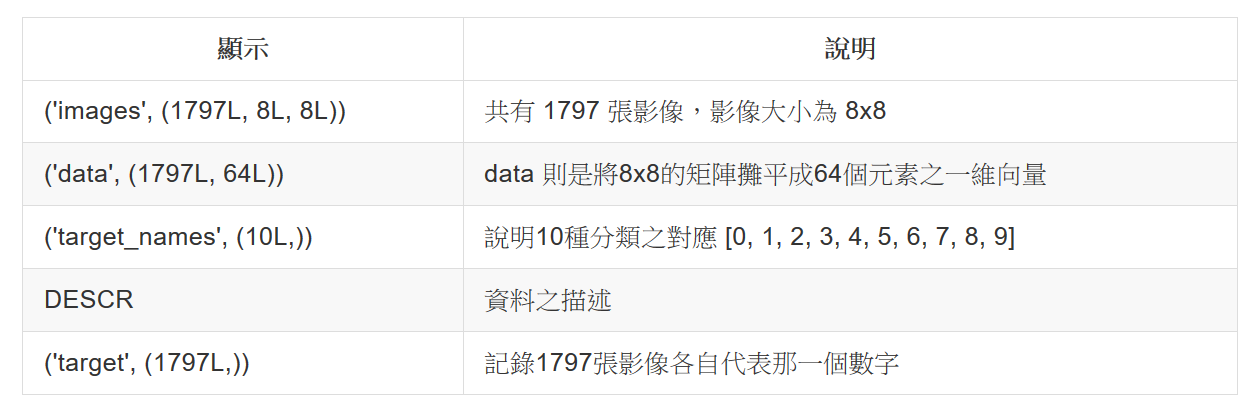

In [17]:
from sklearn import datasets
from sklearn import svm, metrics
import matplotlib.pyplot as plt

#載入數字資料集 (將一個dict型別資料存入digits)
digits = datasets.load_digits()
#rint(digits['DESCR'])



9
1797


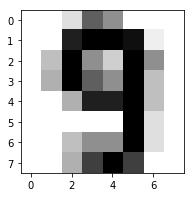

data (1797, 64)
target (1797,)
target_names (10,)
images (1797, 8, 8)
DESCR


In [18]:
#畫出第一個圖片
plt.figure(1, figsize=(3,3))
plt.imshow(digits.images[-2], cmap=plt.cm.gray_r, interpolation='nearest')
print(digits.target[-2])
print(len(digits.data))
plt.show()
for key,value in digits.items() :
    try:
        print (key,value.shape)  #we print it if it has shape attribute. 
    except:
        print (key)
        



# 觀察裏面資料

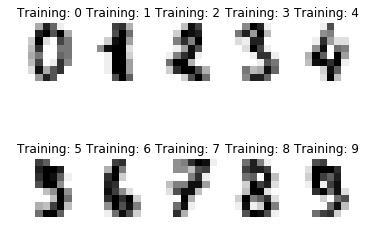

In [19]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    if index<5 : plt.subplot(3, 5, index + 1)
    else:plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [22]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
print(n_samples)
print(digits.images.shape)
data = digits.images.reshape((n_samples, -1))
print(data.shape)
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)  #gamma=0.001

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

1797
(1797, 8, 8)
(1797, 64)
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

   micro avg       0.97      0.97      0.97       899
   macro avg       0.97      0.97      0.97       899
weigh

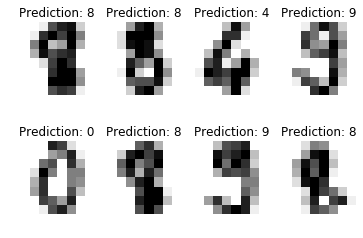

In [11]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:8]):
    plt.subplot(2, 4, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)


plt.show()